In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Read the data into python
2. Check for null values
3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.
4. Carry out correlation analysis on the dataset and find the correlation factor between 

    a. ph and Chloramines \
    b. ph and Conductivity 

   What do we infer from this correlation value?

1. Reading the data into python

In [2]:
data = pd.read_csv('water quality.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


2. Checking for null values

In [5]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

*This dataset has no null values.*

3. Examining the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’.

In [6]:
# using describe() 
print(data[['Hardness', 'Sulfate', 'Organic_carbon']].describe())

          Hardness      Sulfate  Organic_carbon
count  2011.000000  2011.000000     2011.000000
mean    195.968072   333.224672       14.357709
std      32.635085    41.205172        3.324959
min      73.492234   129.000000        2.200000
25%     176.744938   307.632511       12.124105
50%     197.191839   332.232177       14.322019
75%     216.441070   359.330555       16.683049
max     317.338124   481.030642       27.006707


In [7]:
column_data = ['Hardness', 'Sulfate', 'Organic_carbon']

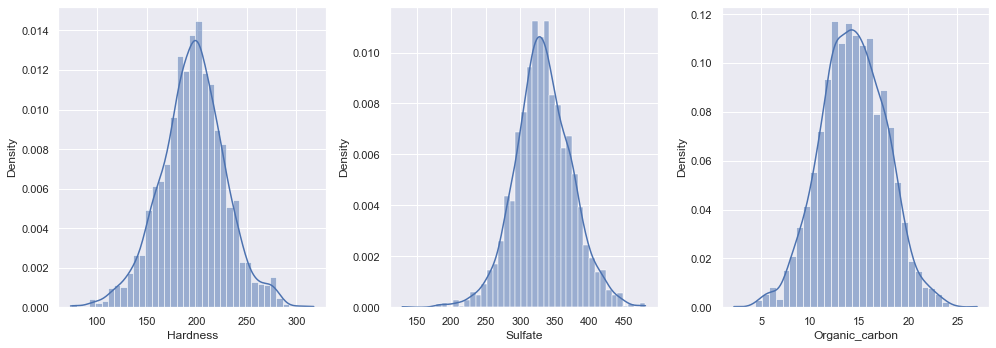

In [8]:
sns.set(style="darkgrid")
fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(14,5))
for i in range(len(column_data)):
    sns.histplot(data=data[column_data[i]],kde=True,stat='density',ax=axes[i])
plt.tight_layout()

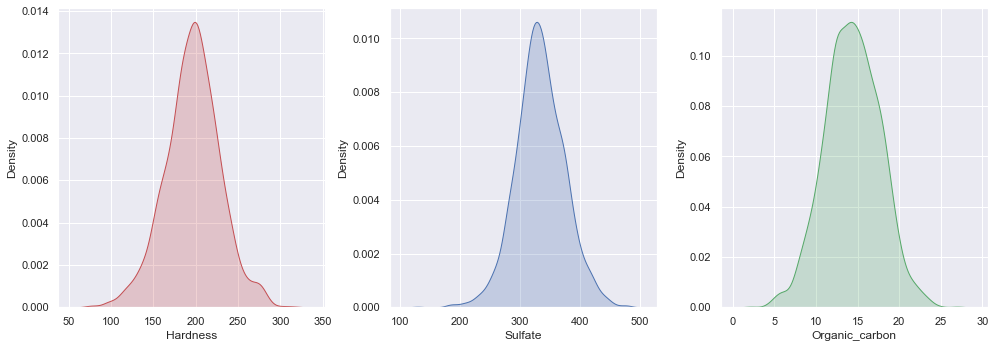

In [9]:
fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(14,5))

sns.kdeplot(data['Hardness'], shade=True, color="r",ax=axes[0])
sns.kdeplot(data['Sulfate'], shade=True, color="b",ax=axes[1])
sns.kdeplot(data['Organic_carbon'], shade=True, color="g",ax=axes[2])

plt.tight_layout()

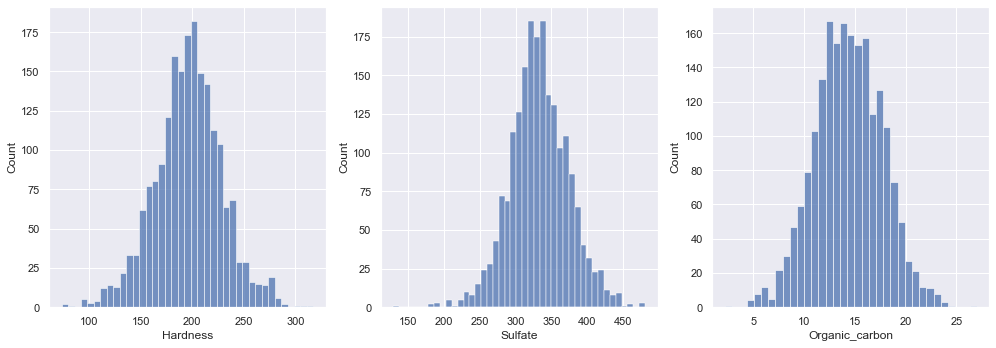

In [10]:
#column_data = pd.Series(['Hardness', 'Sulfate', 'Organic_carbon'])
fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(14,5))
for i in range(len(column_data)):
    sns.histplot(data=data[column_data[i]], ax=axes[i])
plt.tight_layout()

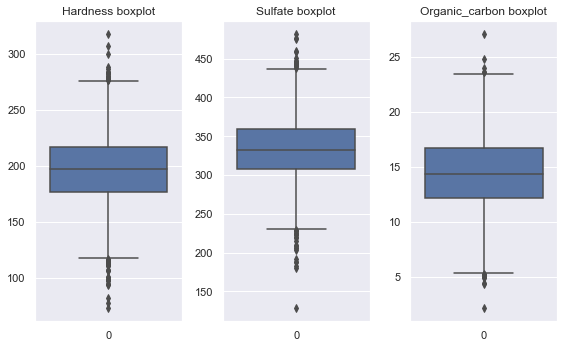

In [11]:
fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(8,5))
for i in range(len(column_data)):
    sns.boxplot(data=data[column_data[i]],ax=axes[i]).set(title=column_data[i] + " boxplot")
plt.tight_layout()

4. Correlation Analysis of the dataset

<AxesSubplot:>

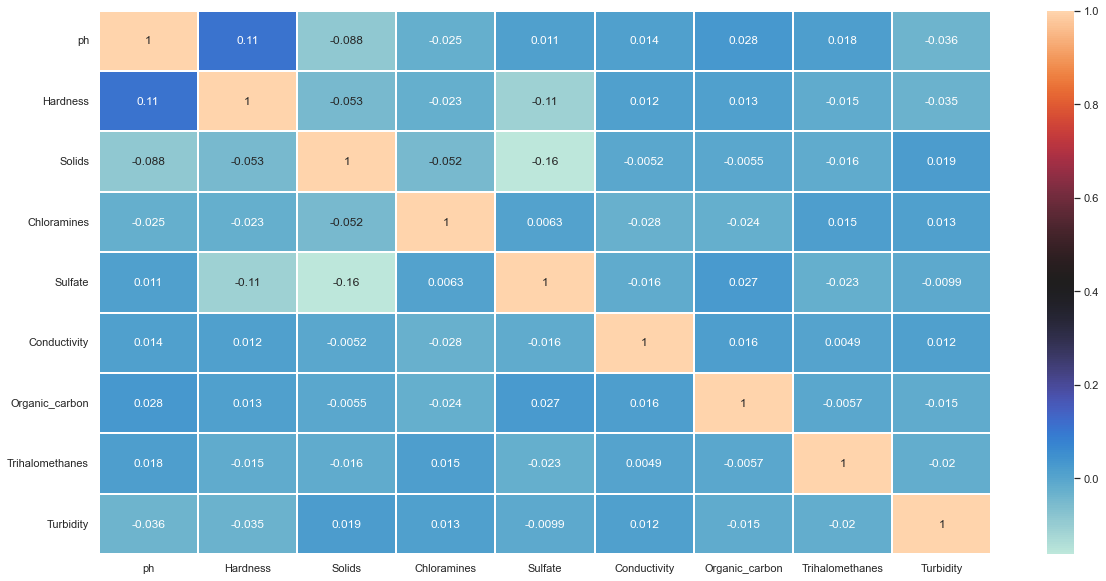

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(),annot=True,linewidth=0.2,cmap='icefire')

Heat map shows weak correlation.

a. The correlation factor between pH and Chloramines

In [13]:
data['ph'].corr(data['Chloramines']).round(4)

-0.0248

A negative correlation factor exists between pH and Chloramines.

b. The correlation factor between pH and Conductivity

In [14]:
data['ph'].corr(data['Conductivity']).round(4)

0.0141

The correlation factor is positive but still very low to consider a correlation between the two variables.